Data Visualization for Exploratory Data Analysis

In [7]:
import plotly
from plotly import __version__
# This line imports specific functions and modules from the Plotly's offline submodule. 
# These functions are used for offline plotting in Jupyter Notebooks.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Plotly for offline use (if needed)
init_notebook_mode(connected=True)

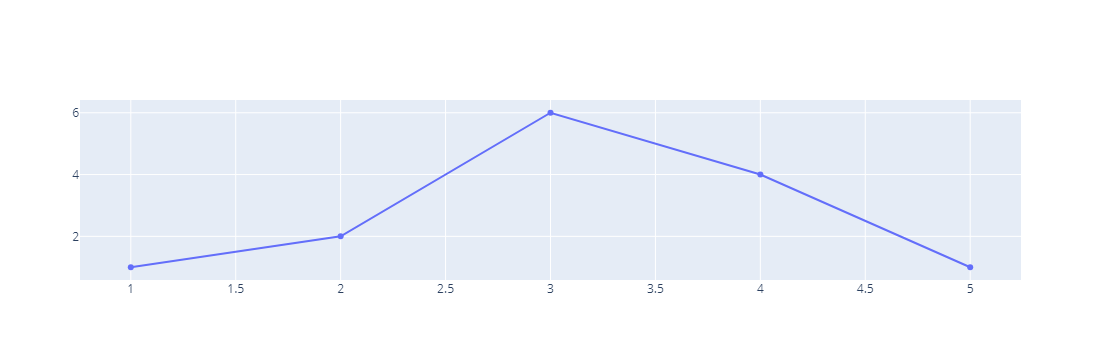

In [8]:
# This line of code generates an interactive plot within a Jupyter Notebook using the iplot function
iplot([{"x": [1, 2, 3, 4, 5], "y": [1, 2, 6, 4, 1]}])

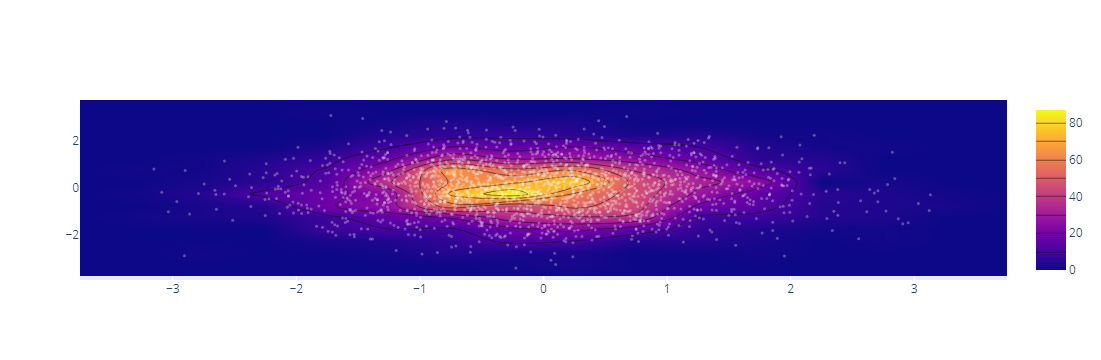

In [9]:
 # This line imports the Plotly graph objects module as go, which allows you to create various types of plots.
import plotly.graph_objs as go
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)

# go.Histogram2dContour: This component represents a 2D histogram contour plot using the x and y data.
# The contours parameter specifies that the contour lines should be colored like a heatmap, highlighting data density.

# go.Scatter: This component represents a scatter plot using the same x and y data points. The mode parameter is set to 'markers', 
# indicating individual data points, and the marker is customized to be white, small-sized, and partially transparent.
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

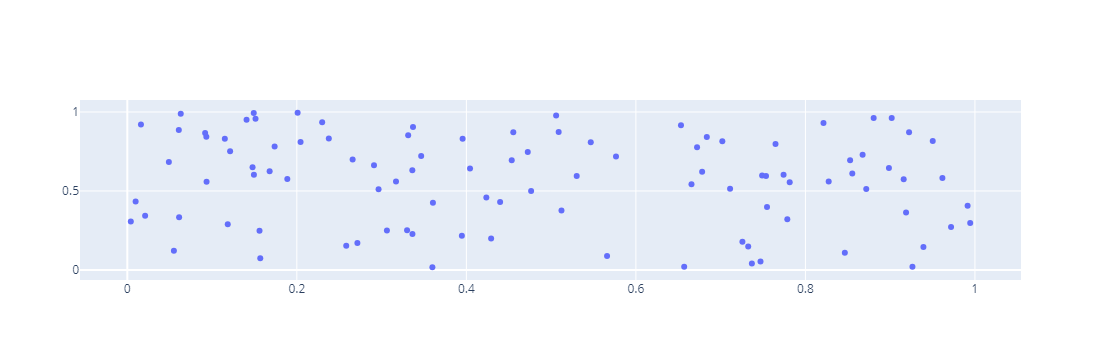

In [10]:
N = 100
example_x = np.random.rand(N)
example_y = np.random.rand(N)


trace = go.Scatter(
    x = example_x,
    y = example_y,
    mode = 'markers')

# This line creates a list called data that contains the trace object created in the previous step. Essentially, it prepares the data to be plotted.
data = [trace]
iplot(data)

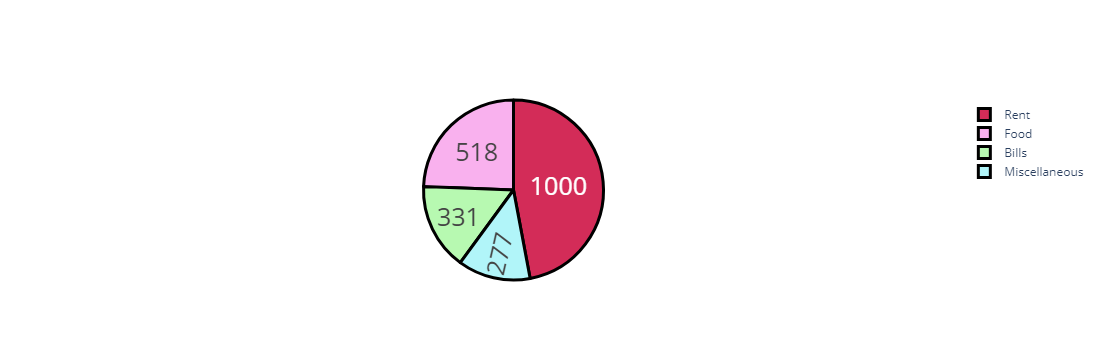

In [11]:
#Expenses

#breakdown each category 
groups = ['Rent','Food','Bills','Miscellaneous']
#create amount
amount = [1000,518,331,277]
#style
colors = ['#d32c58', '#f9b1ee', '#b7f9b1', '#b1f5f9']

trace = go.Pie(labels=groups, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=3)))

#plot - 
iplot([trace])

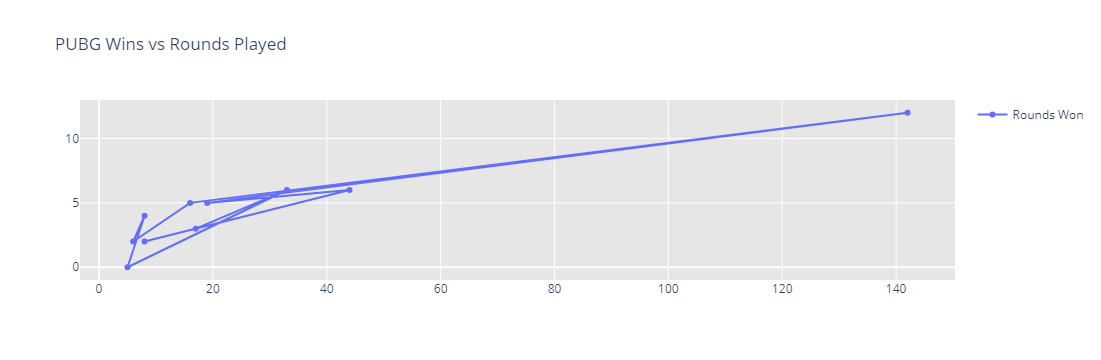

In [12]:
import pandas as pd

pubg = pd.read_csv('PUBG.csv')
#pubg.head(10)
df_pubg = pubg.apply(pd.to_numeric, errors='ignore')
df_new_pubg = df_pubg.head(10)


trace = go.Scatter(x = df_new_pubg['solo_RoundsPlayed'], y= df_new_pubg['solo_Wins'],
                  name ='Rounds Won')
layout = go.Layout(title='PUBG Wins vs Rounds Played',
                   plot_bgcolor='rgb(230, 230,230)', 
                   showlegend=True)
fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='test')

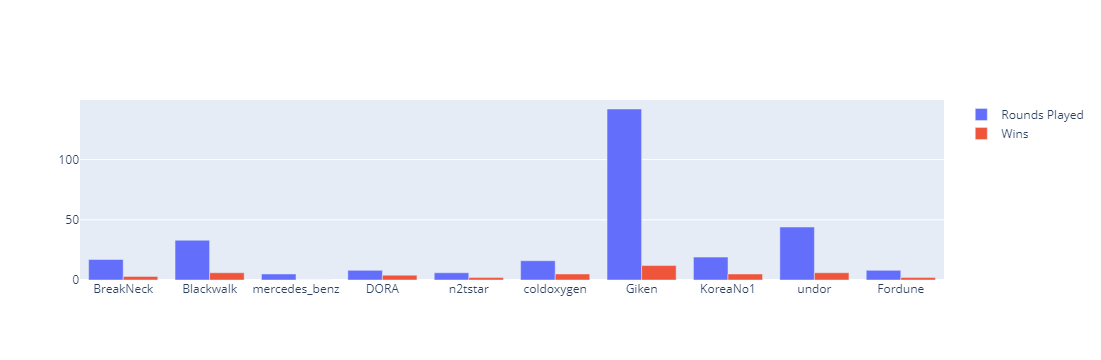

In [13]:
# plot to observe the no. of solo games played and the no. of solo wins for the first 10 entries in the dataset

df_bar_pubg = df_pubg.head(10)

trace1 = go.Bar( 
        x = df_bar_pubg['player_name'],
        y = df_bar_pubg['solo_RoundsPlayed'],
        name= 'Rounds Played')

trace2 = go.Bar( 
        x = df_bar_pubg['player_name'],
        y = df_bar_pubg['solo_Wins'],
        name= 'Wins')

data = [trace1, trace2]
layout = go.Layout(barmode='group')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

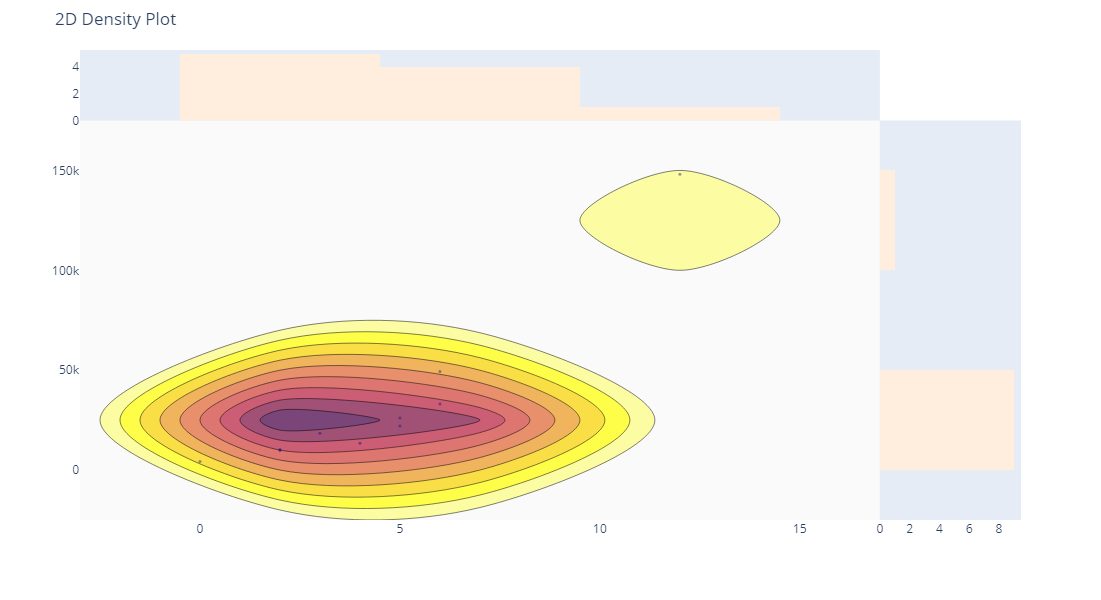

In [14]:
import plotly.figure_factory as ff

x = df_bar_pubg['solo_Wins']
y = df_bar_pubg['solo_TimeSurvived']

# This line defines a custom colorscale that will be used for the density plot.
# A colorscale determines the colors used to represent the density values in the plot.
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

# hist_color: This parameter sets the color of the histogram bins in the plot.
# point_size: This parameter determines the size of the data points in the plot.
fig = ff.create_2d_density(
    x, y, colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', point_size=3
)


iplot(fig, filename='histogram_subplots')

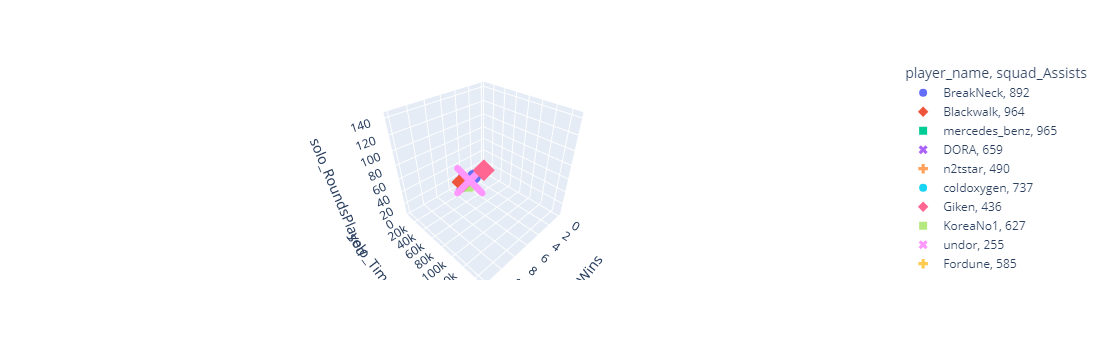

In [15]:
# 3D PLOT

import plotly.express as px

# color='player_name': This parameter assigns colors to the data points based on the 'player_name' column in the DataFrame.
# Each unique 'player_name' will have a different color.
# symbol='squad_Assists': This parameter assigns different symbols (markers) to the data points based on the 'squad_Assists' column in the DataFrame.
# Different values of 'squad_Assists' will result in different marker symbols.

fig = px.scatter_3d(df_bar_pubg, x='solo_Wins', y='solo_TimeSurvived', z='solo_RoundsPlayed',
                    color='player_name', symbol='squad_Assists')
fig.show()

TIME SERIES


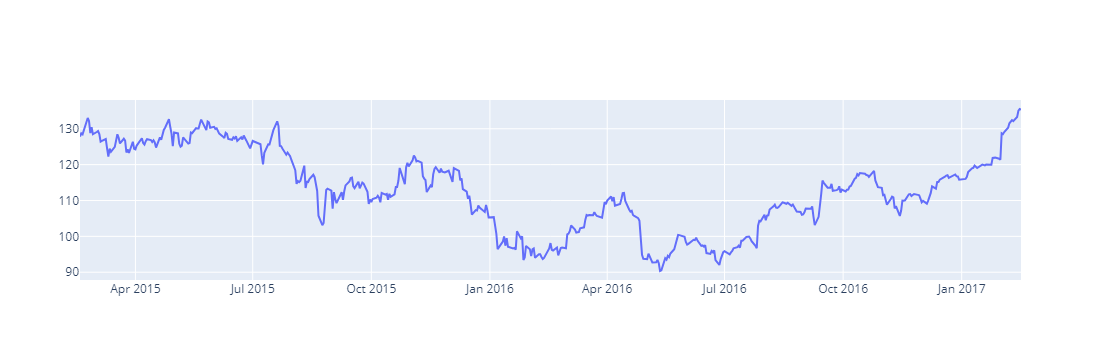

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

# df['Date'] = pd.to_datetime(df['Date']): After loading the data into a Pandas DataFrame ('df'), this line converts the 'Date' column from a string 
# format to a datetime format. 
# This conversion is important for correctly representing and plotting time-series data.
df['Date'] = pd.to_datetime(df['Date'])

# y=df['AAPL.Close']: This specifies the y-axis data, representing Apple's closing stock prices ('AAPL.Close' column in the DataFrame).
data = [go.Scatter(
          x=df.Date,
          y=df['AAPL.Close'])]

iplot(data)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_4064\1263136350.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



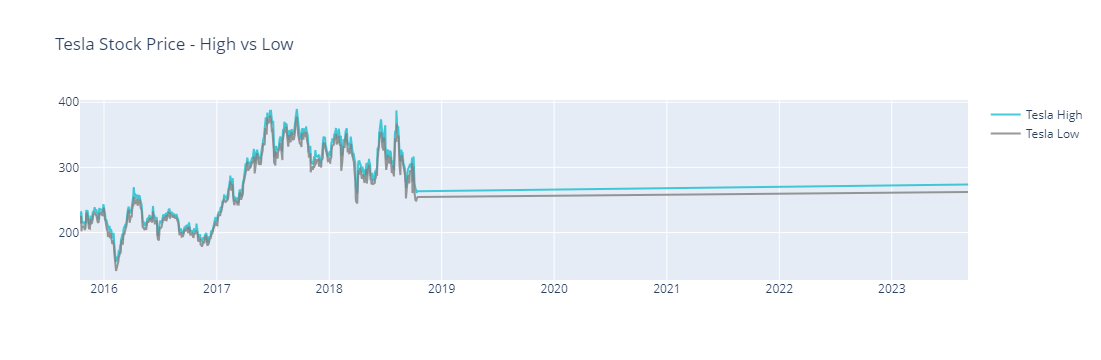

In [17]:

# Read the CSV data
tesla = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")

# Convert the 'date' column to datetime
tesla['date'] = pd.to_datetime(tesla['date'])

trace_one = go.Scatter(
    x=tesla['date'],
    y=tesla['high'],
    name="Tesla High",
    line=dict(color='#17BECF'),
    opacity=0.8)

trace_two = go.Scatter(
    x=tesla['date'],
    y=tesla['low'],
    name="Tesla Low",
    line=dict(color='#7F7F7F'),
    opacity=0.8)

data = [trace_one, trace_two]

layout = dict(
    title='Tesla Stock Price - High vs Low')

fig = dict(data=data, layout=layout)

# Display the plot
iplot(fig, filename='Tesla Stock Comparison')


MAPS

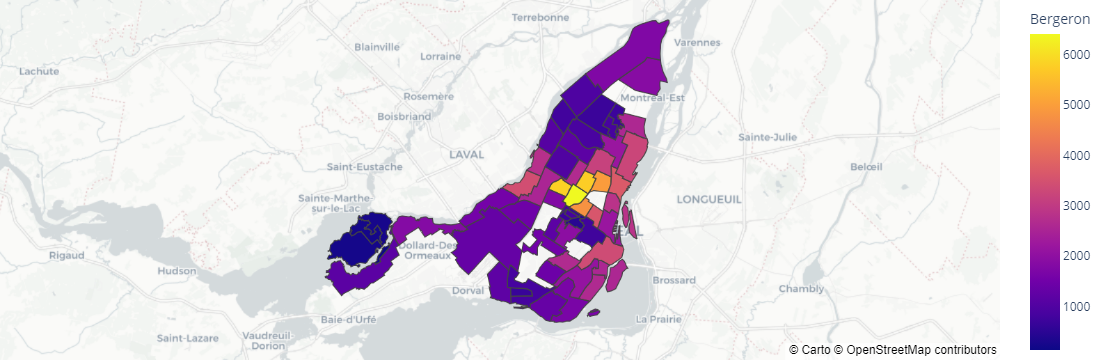

In [18]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

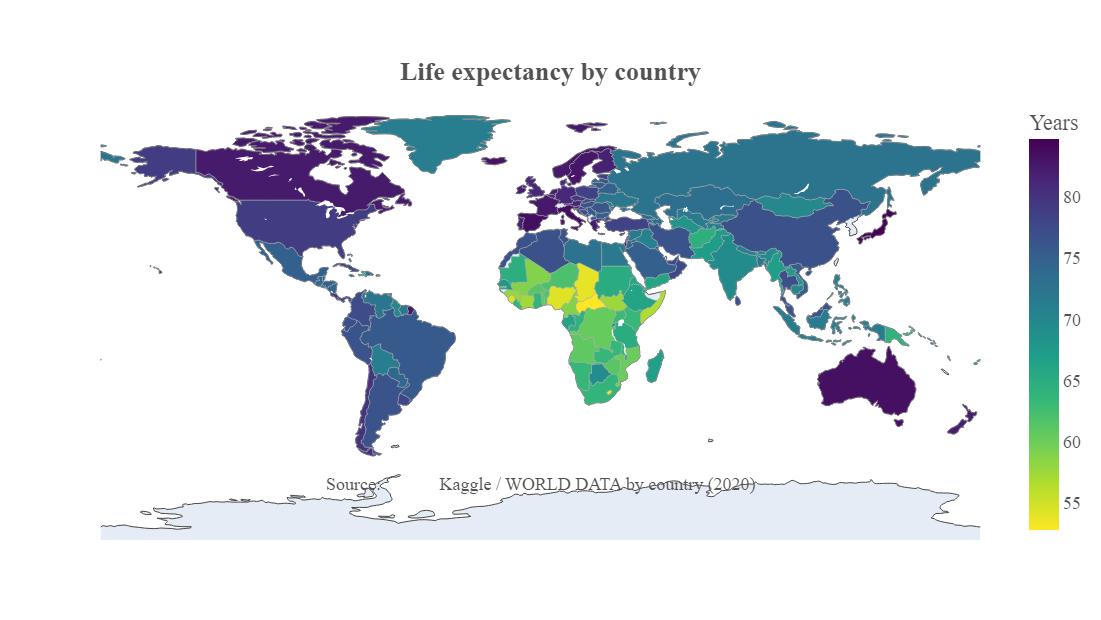

In [27]:
import pandas as pd

df = pd.read_csv('Life expectancy.csv')
df.head()

# locations = df['ISO-code']: Specifies the ISO country codes as the location identifiers.
# z = df['Life expectancy']: Sets the life expectancy values as the values to be represented by color on the map.
# text = df['Country']: Provides text labels for each country on the map.
# colorscale = 'Inferno': Defines the color scale to be used for mapping values to colors. In this case, it's using the 'Inferno' color scale.
# autocolorscale=False: Disables the automatic scaling of colors.
# reversescale=True: Reverses the color scale to show lower values in a darker color.
# marker_line_color='darkgray': Sets the color of the lines between countries on the map.
# marker_line_width=0.5: Specifies the width of the lines between countries.
# colorbar_title = 'Years': Sets the title for the color bar that represents the life expectancy values.
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO-code'],
    z = df['Life expectancy'],
    text = df['Country'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Years',
))




# width and height: Sets the dimensions of the map.
# geo: Configures the map's geographical properties, such as frame, coastlines, and projection type.
# title: Sets the title of the map.
# font: Specifies the font properties for the title and other text on the map.
# annotations: Adds an annotation to the map with a hyperlink to the data source (Kaggle).
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Life expectancy by country</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
    annotations = [dict(
        x=0.5,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/daniboy370/world-data-by-country-2020">\
            Kaggle / WORLD DATA by country (2020)</a>',
        showarrow = False
    )]
)
            
fig.show()
    